In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import scipy.ndimage as ndi
import os

In [2]:
t, p, T2, T = np.genfromtxt(os.path.join('data', 'ESCHERlog_2021_07-13-2020export.csv'),
                            #dtype=[object, float, float],
                            delimiter=',', unpack=True, converters={0: lambda x: np.datetime64(x)})

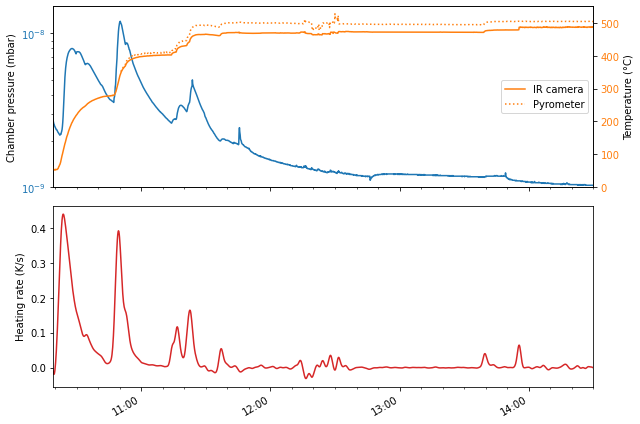

In [3]:
fig, (ax, ax3) = plt.subplots(nrows=2, figsize=[9, 6])
ax.semilogy(t, p)
ax.set_ylim(1e-9, 1.5e-8)
fig.autofmt_xdate()

ax2 = ax.twinx()
ax2.plot(t, T, color="C1", label='IR camera')
ax2.plot(t[T2 > 349.], T2[T2 > 349.], ':', color="C1", label='Pyrometer')
#ax2.plot(t, T2, ':', color="C1")
ax2.tick_params(axis='y', labelcolor="C1")
ax2.set_ylabel('Temperature (°C)')
ax2.set_ylim(0, 550)
ax2.legend(loc='center right')
ax.tick_params(axis='y', labelcolor="C0")
ax.xaxis.set_major_locator(dates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(dates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50]))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.margins(x=0)
ax.set_ylabel('Chamber pressure (mbar)')
ax.set_xlim(np.datetime64('2020-07-13 10:19:00'), np.datetime64('2020-07-13 14:30:00'))

Tsmooth = ndi.gaussian_filter1d(T, sigma=5)
ax3.plot(t, np.diff(Tsmooth, prepend=Tsmooth[0])/10, color='C3')
ax3.set_ylabel('Heating rate (K/s)')
fig.autofmt_xdate()
ax3.set_xlim(np.datetime64('2020-07-13 10:19:00'), np.datetime64('2020-07-13 14:30:00'))
ax3.margins(x=0)
ax3.xaxis.set_major_locator(dates.HourLocator(interval=1))
ax3.xaxis.set_minor_locator(dates.MinuteLocator(byminute=[0, 10, 20, 30, 40, 50]))
ax3.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.savefig(os.path.join("figures", "Sfigheating.pdf"))